<a href="https://colab.research.google.com/github/kogen15923/ml-book-3rd-impl/blob/main/ch04/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 欠損値データの扱い

In [1]:
# CSVファイルから簡単なDataFrameの作成
import pandas as pd
from io import StringIO
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
# StringI0で通常のCSVファイルと同じようにDataFrameに読み込める
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
# isnull(): セルに数値含まれるかどうか(True or False)
# sum(): 欠損値の個数を列ごとに合計
df.isnull().sum()

,0
A,0
B,0
C,1
D,1


欠損値を取り除く方法(dropnaの使い方)

In [3]:
# axis=0は欠損値を含む行の削除
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
# axis=0は欠損値を含む列の削除
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [5]:
# how='all'は全ての列が欠損値の行だけ削除
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
# thresh=4は非欠損値が4つ未満の行を削除
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
# subset=['C']特定の列('C')に欠損血が含まれている行だけ削除
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


欠損値を補完する方法

In [8]:
# 変換器SimpleImputerによる平均値補完法
# (欠損値を特徴量の列全体の平均値と置き換える)
from sklearn.impute import SimpleImputer
import numpy as np
# missing_values=np.nan欠損値種類
# strategy='mean'は平均値補完、
# 'median'は中央値、'most_frequent'は最頻値(カテゴリデータに適する)
imr = SimpleImputer(missing_values=np.nan, strategy='mean')

imr = imr.fit(df.values)

imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [9]:
# pandasのfillnaメソッドで平均値補完
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


# カテゴリデータの処理

In [10]:
# あらゆる種類の特徴量を含むDataFrameの作成
import pandas as pd
# 名義特徴量(color)、順序特徴量(size)、数値特徴量(price)
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
print(df)

   color size  price classlabel
0  green    M   10.1     class2
1    red    L   13.5     class1
2   blue   XL   15.3     class2


順序特徴量のマッピング

In [11]:
# カテゴリを整数に変換(変換マッピングは明示的に)
# XL = L+1 = M+2
size_mapping = {'XL': 3, 'L': 2, 'M': 1}

df['size'] = df['size'].map(size_mapping)
print(df)

   color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2


In [12]:
# 元の文字列表現に戻す時は逆マッピング
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

,size
0,M
1,L
2,XL


クラスラベルのエンコーディング

In [13]:
# 順序の関係ないクラスラベルの整数への変換
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
print(class_mapping)

{'class1': 0, 'class2': 1}


In [14]:
# DataFrameに適用
df['classlabel'] = df['classlabel'].map(class_mapping)
print(df)

   color  size  price  classlabel
0  green     1   10.1           1
1    red     2   13.5           0
2   blue     3   15.3           1


In [15]:
# クラスラベルを文字列に戻すときはキーと値のペアの順序を逆
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
print(df)

   color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2


In [16]:
# scikit-learnのLabelEncoderを用いたクラスラベルのエンコーディング(おすすめ)
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [17]:
# inverse_transformメソッドを使ったクラスラベルを文字列に戻す方法(おすすめ)
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

名義特徴量のone-hotエンコーディング

In [18]:
# LabelEncoderを用いた間違いパターン(大きさの意味性ができてしまう)
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [19]:
# scikit-learnのpreprocesingモジュールのOneHotEncoderクラスでダミー特徴量を作る
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [20]:
# scikit-leranのcomposeモジュールのColumnTransformerクラスを用いて複数特徴量の配列の列を選択的に変換する
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [21]:
# pandasのget_dummiesでダミー特徴量作る場合: 文字列値の列だけ変換される
print(pd.get_dummies(df[['color', 'size', 'price']]))

   size  price  color_blue  color_green  color_red
0     1   10.1       False         True      False
1     2   13.5       False        False       True
2     3   15.3        True        False      False


In [22]:
# OneHotEncoderを用いる時の多重共線性への対処(drop_first=true)
print(pd.get_dummies(df[['price', 'color', 'size']], drop_first=True))

   price  size  color_green  color_red
0   10.1     1         True      False
1   13.5     2        False       True
2   15.3     3        False      False


In [23]:
# get_dummiesを用いる時の多重共線性への対処(drop='first', categories='auto')
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

順序特徴量のエンコーディング

In [24]:
# わかりやすいように元のDataFrameを出力する
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [25]:
# 順序特徴量のカテゴリ間の違い(M, L, XLは等間隔ではない)を考慮した閾値エンコーディング
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)
# 元のsizeは不要なので削除
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


# データセットの分割

In [26]:
# Wineデータセットの読み込み
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
# 列名設定
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
# scikit-learnのmodel_selectionモジュールのtrain_test_split関数でデータをランダム分割
from sklearn.model_selection import train_test_split
# 特徴量とクラスラベルを別々に抽出
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
# 全体の30%をテストデータ、70%を訓練データ
# stratify=yは層化サンプリングのため(yの比率維持)
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.3,
                     random_state=0,
                     stratify=y)

# 特徴量スケーリング

In [28]:
# 0~5の整数データセットを用いて正規化と標準化の比較
ex = np.array([0, 1, 2, 3, 4, 5])

print('standardized:', (ex - ex.mean()) / ex.std())

print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [29]:
# scikit-learnのpreprocessingモジュールの
# MinMaxScalerクラスを用いた正規化(min-maxスケーリング)
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [30]:
# scikit-learnのpreprocessingモジュールの
# StandardScalerクラスを用いた標準化
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [31]:
# 外れ値多い小さなデータセットor過学習に陥りやすいアルゴリズムに
# 向いてるscikit-learnのpreprocessingモジュールのRobustScalerクラス


# 特徴量選択

過学習の対処法は一般的に四種類:
1.   訓練データをさらに集める
2.   **正則化を通じて複雑さにペナルティを課す**
3.   パラメータ数が少ないより単純なモデルを選択する
4.   データの次元数を減らす(特徴量選択&抽出)

特徴量選択には二つの目的:
1. 最も関連ある特徴量グループを選択することにより計算効率を改善
2. 無関係の特徴量やノイズを取り除くことによりモデルの汎化誤差を減らす

実際の使用ではラッパー法、埋め込み法、フィルタ法の選択については計算コストとモデルの性能のトレードオフを考慮して使用

# L1正則化による特徴量選択

埋め込み法の一つ、線形モデルのみだがコスト低い

In [32]:
# scikit-learnのlinear_model(線形)モジュールで提供される正則化
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr')

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [33]:
# .intercept_属性を用いて切片(バイアス)係数の表示
# (OvRなのでそれぞれクラス対他クラスの正解率)
lr.intercept_

array([-1.26335804, -1.21591894, -2.3704178 ])

In [34]:
# lr.coef_属性を用いた重み係数の表示
lr.coef_

array([[ 1.24611481,  0.18101958,  0.7424672 , -1.16017924,  0.        ,
         0.        ,  1.17499183,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54163129,  2.51131797],
       [-1.53681933, -0.38754945, -0.9951981 ,  0.36505908, -0.05979712,
         0.        ,  0.66843257,  0.        ,  0.        , -1.9346281 ,
         1.23340083,  0.        , -2.23198035],
       [ 0.13569437,  0.16864208,  0.35717832,  0.        ,  0.        ,
         0.        , -2.43812385,  0.        ,  0.        ,  1.56369153,
        -0.81847726, -0.49271123,  0.        ]])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

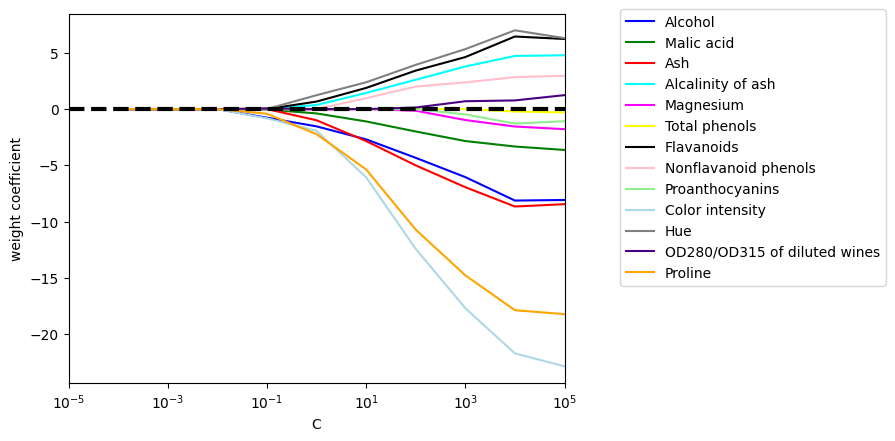

In [35]:
# 正則化パス(=目的関数との線形的評価にもどづく特徴量の重要度パス)
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
# 重み係数と逆正則化パラメータ
weights, params = [], []
# 逆正則化パラメータの値ごとに処理
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
# 各重み係数をプロット
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

# SBSによる特徴量選択

ラッパー法の一つ、モデルに最適な特徴量選択できる代わりにコスト高め

In [36]:
# 逐次後退選択(SBS)の実装
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring                # 特徴量を評価する指標
        self.estimator = clone(estimator)     # 推定器
        self.k_features = k_features          # 選択する特徴量の個数
        self.test_size = test_size            # テストデータの割合
        self.random_state = random_state      # 乱数シード

    def fit(self, X, y):
        # データ分割
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
        # 全ての特徴量の個数、列インデックス
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        # スコアの算出
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        # 特徴量が指定した数なるまでくり返す
        while dim > self.k_features:
            scores = []     # 空のスコアリストの作成
            subsets = []    # 空のインデックスリストの作成

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            # 最良のスコアを抽出
            best = np.argmax(scores)
            # 最良のスコアのインデックスを抽出
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            # スコアを格納
            self.scores_.append(scores[best])
        # 最後に格納したスコア
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

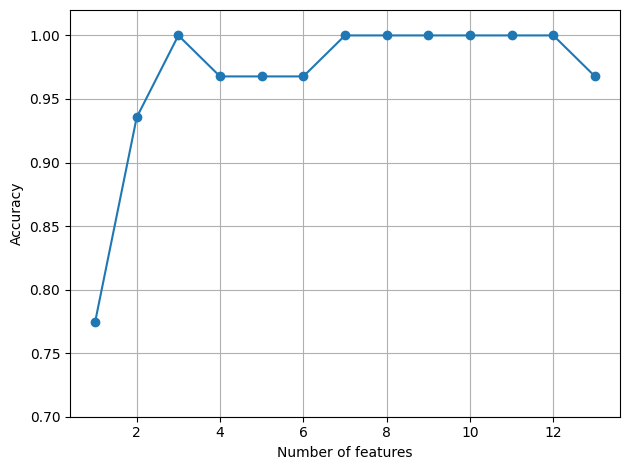

In [37]:
# scikit-learnのneighborsクラスのKNN分類器でSBSの実装確認
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# KNNのインスタンス生成
knn = KNeighborsClassifier(n_neighbors=5)
# SBSのインスタンス生成
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [38]:
# 最良性能を達成した3つの特徴量の確認
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [39]:
# 特徴量全体で性能評価
knn.fit(X_train_std, y_train)
# 訓練の正解率
print('Training accuracy:', knn.score(X_train_std, y_train))
# テストの正解率
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [40]:
# 最良性能の3つの特徴量で性能評価
knn.fit(X_train_std[:, k3], y_train)
# 訓練の正解率
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
# テストの正解率
print('Test accuuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuuracy: 0.9259259259259259


# ランダムフォレストによる特徴量選択

<br>埋め込み方の一つ、非線形対応とコスト低めの代わりにカットオフを自分で決める<br>
相関の高さによる重要度が高いことは判別不能

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


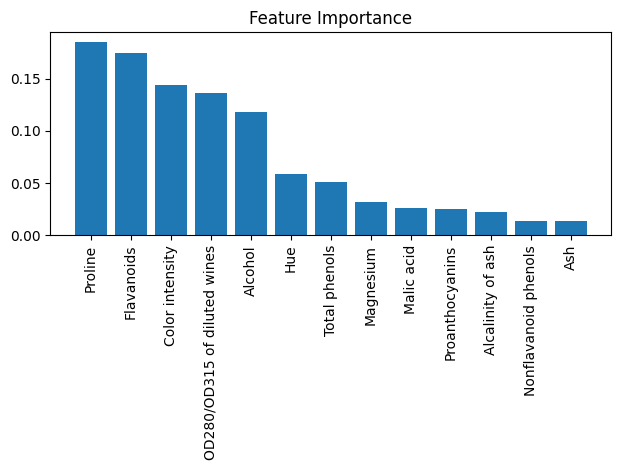

In [41]:
from sklearn.ensemble import RandomForestClassifier
# 特徴量の名前
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
# 特徴量の重要度を抽出
importances = forest.feature_importances_
# 降順でインデックス抽出
indices = np.argsort(importances)[::-1]
# 降順で特徴量の名前、重要度を表示
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [42]:
# scikit-learnのfeature_selectionのSelectFromModelによる一定閾値以上の重要度を持つ特徴量の選択
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
# 特徴量を抽出
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:',
      X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
